## ANN for 2 layer MCX data fitting HHB2

In [237]:
import pandas as pd
import glob
import os

### Simulation data

In [240]:
csv_folder = 'C:/Users/Haiya/2layer_sim/MCX_bbnirs_simulation_2layer/simulations/2layer_simlulation/sim_results/1_4/fd'
GT_folder = 'C:/Users/Haiya/2layer_sim/MCX_bbnirs_simulation_2layer/simulations/2layer_simlulation/data_generation/split_files/'

In [242]:
csv_files = glob.glob(os.path.join(csv_folder, '*.csv'))
df_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [243]:
df_all.head()

,ID,Uac_1_1,Udc_1_1,Phase_1_1,Uac_1_2,Udc_1_2,Phase_1_2,Uac_1_3,Udc_1_3,Phase_1_3,...,Phase_4_5,Uac_4_6,Udc_4_6,Phase_4_6,Uac_4_7,Udc_4_7,Phase_4_7,Uac_4_8,Udc_4_8,Phase_4_8
0,1,0.000630,0.000665,-0.501516,0.000645,0.000680,-0.494211,0.000654,0.000687,-0.479320,...,-0.956285,0.000022,0.000024,-0.938081,0.000022,0.000024,-0.907132,0.000022,0.000024,-0.899211
1,2,0.000659,0.000704,-0.528213,0.000675,0.000720,-0.520862,0.000685,0.000727,-0.505208,...,-1.018659,0.000027,0.000030,-1.001600,0.000027,0.000030,-0.971622,0.000027,0.000030,-0.959532
2,3,0.000677,0.000730,-0.549963,0.000693,0.000747,-0.542363,0.000704,0.000755,-0.526124,...,-1.077448,0.000031,0.000035,-1.060109,0.000031,0.000035,-1.031858,0.000032,0.000035,-1.016267
3,4,0.000686,0.000749,-0.566580,0.000703,0.000766,-0.558862,0.000714,0.000773,-0.542014,...,-1.130043,0.000034,0.000039,-1.111908,0.000034,0.000039,-1.084599,0.000035,0.000040,-1.067255
4,5,0.000691,0.000761,-0.578840,0.000708,0.000778,-0.570998,0.000719,0.000785,-0.553765,...,-1.176073,0.000036,0.000042,-1.156740,0.000037,0.000043,-1.129599,0.000037,0.000043,-1.110989


In [245]:
csv_files = glob.glob(os.path.join(GT_folder, '*.csv'))
GT_all = pd.concat([pd.read_csv(f) for f in csv_files], ignore_index=True)

In [247]:
GT_all.head

<bound method NDFrame.head of           ID  HBO1  HHB1  HBO2  HHB2  Thickness  complete
0          1   5.0   2.5    25    15         10     False
1          2   5.0   2.5    25    15         12     False
2          3   5.0   2.5    25    15         14     False
3          4   5.0   2.5    25    15         16     False
4          5   5.0   2.5    25    15         18     False
...      ...   ...   ...   ...   ...        ...       ...
87841  87842  20.0  12.5    55    35         12     False
87842  87843  20.0  12.5    55    35         14     False
87843  87844  20.0  12.5    55    35         16     False
87844  87845  20.0  12.5    55    35         18     False
87845  87846  20.0  12.5    55    35         20     False

[87846 rows x 7 columns]>

### Merge data

In [252]:
GT_all['ID'] = GT_all['ID'].astype(int)
df_all['ID'] = df_all['ID'].astype(int)
GT_all = GT_all.sort_values('ID').reset_index(drop=True)
df_all = df_all.sort_values('ID').reset_index(drop=True)

In [254]:
merged_df = pd.merge(df_all, GT_all, on='ID', how='inner')

In [256]:
merged_df.head

<bound method NDFrame.head of       ID   Uac_1_1   Udc_1_1  Phase_1_1   Uac_1_2   Udc_1_2  Phase_1_2  \
0      1  0.000630  0.000665  -0.501516  0.000645  0.000680  -0.494211   
1      2  0.000659  0.000704  -0.528213  0.000675  0.000720  -0.520862   
2      3  0.000677  0.000730  -0.549963  0.000693  0.000747  -0.542363   
3      4  0.000686  0.000749  -0.566580  0.000703  0.000766  -0.558862   
4      5  0.000691  0.000761  -0.578840  0.000708  0.000778  -0.570998   
..   ...       ...       ...        ...       ...       ...        ...   
155  156  0.000692  0.000766  -0.584238  0.000710  0.000784  -0.576365   
156  157  0.000611  0.000640  -0.482166  0.000627  0.000656  -0.475665   
157  158  0.000649  0.000687  -0.513365  0.000665  0.000703  -0.506709   
158  159  0.000671  0.000719  -0.538951  0.000688  0.000736  -0.531871   
159  160  0.000683  0.000741  -0.558647  0.000700  0.000758  -0.551327   

      Uac_1_3   Udc_1_3  Phase_1_3  ...  Phase_4_7   Uac_4_8   Udc_4_8  \
0    0.

In [258]:
X = merged_df[df_all.columns.difference(['ID'])]
Y = merged_df[['HBO1', 'HHB1', 'HBO2', 'HHB2', 'Thickness']]

In [260]:
X

,Phase_1_1,Phase_1_2,Phase_1_3,Phase_1_4,Phase_1_5,Phase_1_6,Phase_1_7,Phase_1_8,Phase_2_1,Phase_2_2,...,Udc_3_7,Udc_3_8,Udc_4_1,Udc_4_2,Udc_4_3,Udc_4_4,Udc_4_5,Udc_4_6,Udc_4_7,Udc_4_8
0,-0.501516,-0.494211,-0.479320,-0.466597,-0.453209,-0.442392,-0.434354,-0.426198,-0.693509,-0.685174,...,0.000069,0.000069,0.000024,0.000026,0.000025,0.000025,0.000024,0.000024,0.000024,0.000024
1,-0.528213,-0.520862,-0.505208,-0.492353,-0.478282,-0.467212,-0.458873,-0.450206,-0.736003,-0.725650,...,0.000080,0.000081,0.000030,0.000032,0.000031,0.000031,0.000030,0.000030,0.000030,0.000030
2,-0.549963,-0.542363,-0.526124,-0.513049,-0.498408,-0.487087,-0.478677,-0.469506,-0.772475,-0.760532,...,0.000090,0.000091,0.000035,0.000037,0.000036,0.000036,0.000036,0.000035,0.000035,0.000035
3,-0.566580,-0.558862,-0.542014,-0.528792,-0.513907,-0.502234,-0.494043,-0.484335,-0.802565,-0.789521,...,0.000098,0.000099,0.000039,0.000041,0.000040,0.000040,0.000040,0.000039,0.000039,0.000040
4,-0.578840,-0.570998,-0.553765,-0.540315,-0.525392,-0.513456,-0.505478,-0.495419,-0.825953,-0.812318,...,0.000103,0.000105,0.000043,0.000045,0.000044,0.000044,0.000044,0.000042,0.000043,0.000043
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,-0.584238,-0.576365,-0.559077,-0.545656,-0.530728,-0.518724,-0.510897,-0.500731,-0.836362,-0.822579,...,0.000106,0.000108,0.000044,0.000047,0.000045,0.000045,0.000045,0.000044,0.000045,0.000045
156,-0.482166,-0.475665,-0.462100,-0.450176,-0.437614,-0.427277,-0.419505,-0.411771,-0.660450,-0.654636,...,0.000062,0.000063,0.000020,0.000022,0.000021,0.000022,0.000021,0.000020,0.000020,0.000021
157,-0.513365,-0.506709,-0.492039,-0.479824,-0.466368,-0.455720,-0.447436,-0.439139,-0.709712,-0.701252,...,0.000075,0.000076,0.000026,0.000028,0.000028,0.000028,0.000028,0.000027,0.000027,0.000027
158,-0.538951,-0.531871,-0.516378,-0.503774,-0.489527,-0.478537,-0.470080,-0.461225,-0.752002,-0.741366,...,0.000086,0.000087,0.000032,0.000034,0.000033,0.000034,0.000033,0.000032,0.000032,0.000033


In [262]:
Y

,HBO1,HHB1,HBO2,HHB2,Thickness
0,5.0,2.5,25,15,10
1,5.0,2.5,25,15,12
2,5.0,2.5,25,15,14
3,5.0,2.5,25,15,16
4,5.0,2.5,25,15,18
...,...,...,...,...,...
155,5.0,2.5,31,21,20
156,5.0,2.5,31,23,10
157,5.0,2.5,31,23,12
158,5.0,2.5,31,23,14


In [264]:
X = X.to_numpy()
Y = Y.to_numpy()
#X = X/np.max(X)
Y = Y[:, 3]   # Assuming column 3 is HHB₂
Y = Y.reshape(-1, 1)  # Make it (n_samples, 1) shape for regression

In [266]:
np.max(X)

0.0008265273548387

In [284]:
Y.shape

(160, 1)

In [268]:
#from sklearn.preprocessing import StandardScaler
#scaler_X = StandardScaler()
#X = scaler_X.fit_transform(X)

### ANN based on pytorch

In [271]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

In [289]:
# Split into train/test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Custom PyTorch dataset
class MCXSimDataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.Y = torch.tensor(Y, dtype=torch.float32)
    
    def __len__(self):
        return len(self.X)
    
    def __getitem__(self, idx):
        return self.X[idx], self.Y[idx]

# Create DataLoaders
train_loader = DataLoader(MCXSimDataset(X_train, Y_train), batch_size=16, shuffle=True)
test_loader = DataLoader(MCXSimDataset(X_test, Y_test), batch_size=1, shuffle=False)

In [291]:
class ANN(nn.Module):
    def __init__(self):
        super(ANN, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(96, 1024),
            nn.BatchNorm1d(1024),
            nn.ReLU(),

            nn.Linear(1024, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),

            nn.Linear(2048, 2048),
            nn.BatchNorm1d(2048),
            nn.ReLU(),

            nn.Linear(2048, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),

            nn.Linear(256, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),

            nn.Linear(64, 32),
            nn.ReLU(),

            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.net(x)

model = ANN()

### Model training

In [297]:
#criterion = nn.MSELoss()
criterion = nn.SmoothL1Loss(beta=1.0)
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [299]:
num_epochs = 500

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for batch_X, batch_Y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_Y)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {running_loss / len(train_loader):.4f}")

Epoch 1/500, Loss: 21.2778
Epoch 2/500, Loss: 20.4398
Epoch 3/500, Loss: 19.5071
Epoch 4/500, Loss: 18.4614
Epoch 5/500, Loss: 17.1156
Epoch 6/500, Loss: 15.6342
Epoch 7/500, Loss: 13.8624
Epoch 8/500, Loss: 11.8940
Epoch 9/500, Loss: 10.2305
Epoch 10/500, Loss: 8.0970
Epoch 11/500, Loss: 6.4289
Epoch 12/500, Loss: 6.3558
Epoch 13/500, Loss: 5.5724
Epoch 14/500, Loss: 4.7435
Epoch 15/500, Loss: 4.6750
Epoch 16/500, Loss: 4.3296
Epoch 17/500, Loss: 3.9635
Epoch 18/500, Loss: 2.9753
Epoch 19/500, Loss: 2.6806
Epoch 20/500, Loss: 2.8989
Epoch 21/500, Loss: 3.9419
Epoch 22/500, Loss: 2.7552
Epoch 23/500, Loss: 3.2871
Epoch 24/500, Loss: 2.6617
Epoch 25/500, Loss: 1.9265
Epoch 26/500, Loss: 2.6142
Epoch 27/500, Loss: 2.6061
Epoch 28/500, Loss: 2.9990
Epoch 29/500, Loss: 2.4650
Epoch 30/500, Loss: 2.5821
Epoch 31/500, Loss: 2.4989
Epoch 32/500, Loss: 1.9369
Epoch 33/500, Loss: 1.8656
Epoch 34/500, Loss: 1.6693
Epoch 35/500, Loss: 1.9693
Epoch 36/500, Loss: 1.9596
Epoch 37/500, Loss: 1.7621
E

In [300]:
model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    total_mse = 0
    for batch_X, batch_Y in test_loader:
        preds = model(batch_X)
        print('preds=', preds)
        print('GT   =', batch_Y)
        print('---------')
        all_preds.append(preds.numpy())
        all_targets.append(batch_Y.numpy())
        mse = criterion(preds, batch_Y)
        total_mse += mse.item()
    print(f"Test MSE: {total_mse / len(test_loader):.4f}")

preds= tensor([[12.4126]])
GT   = tensor([[27.]])
---------
preds= tensor([[11.0922]])
GT   = tensor([[29.]])
---------
preds= tensor([[11.6861]])
GT   = tensor([[17.]])
---------
preds= tensor([[11.5508]])
GT   = tensor([[33.]])
---------
preds= tensor([[18.0830]])
GT   = tensor([[23.]])
---------
preds= tensor([[30.6352]])
GT   = tensor([[23.]])
---------
preds= tensor([[29.5160]])
GT   = tensor([[25.]])
---------
preds= tensor([[12.9802]])
GT   = tensor([[31.]])
---------
preds= tensor([[18.5864]])
GT   = tensor([[25.]])
---------
preds= tensor([[15.2274]])
GT   = tensor([[17.]])
---------
preds= tensor([[9.9195]])
GT   = tensor([[21.]])
---------
preds= tensor([[9.9051]])
GT   = tensor([[21.]])
---------
preds= tensor([[12.8066]])
GT   = tensor([[19.]])
---------
preds= tensor([[9.5422]])
GT   = tensor([[15.]])
---------
preds= tensor([[10.2141]])
GT   = tensor([[23.]])
---------
preds= tensor([[10.4705]])
GT   = tensor([[25.]])
---------
preds= tensor([[11.2069]])
GT   = tensor([[

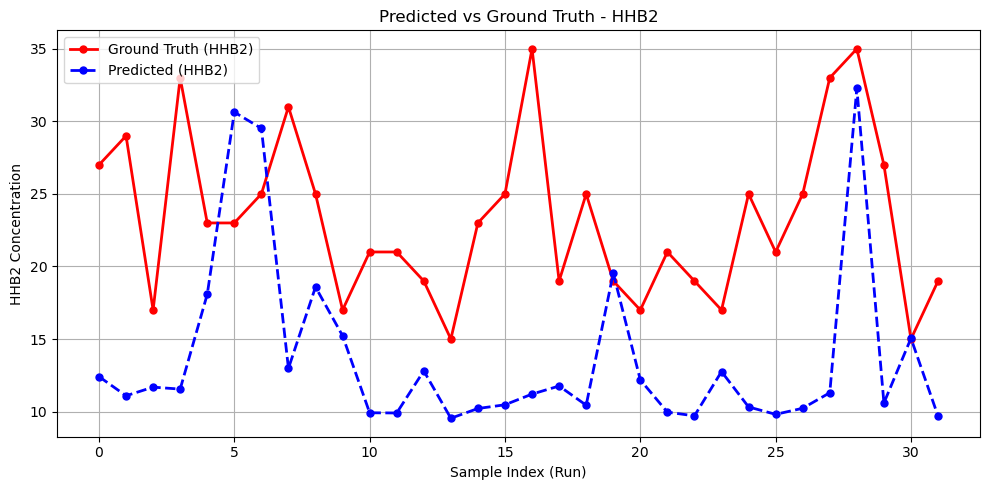

In [354]:
import matplotlib.pyplot as plt
import numpy as np
all_preds = np.array(all_preds).squeeze(1).squeeze(1)
all_targets = np.array(all_targets).squeeze(1).squeeze(1)

plt.figure(figsize=(10, 5))

plt.plot(all_targets, label='Ground Truth (HHB2)', color='red', linewidth=2, marker='o', markersize=5)
plt.plot(all_preds, label='Predicted (HHB2)', color='blue', linestyle='--', linewidth=2, marker='o', markersize=5)

plt.xlabel('Sample Index (Run)')
plt.ylabel('HHB2 Concentration')
plt.title('Predicted vs Ground Truth - HHB2')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### XGboost

In [312]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, max_depth=8, learning_rate=0.05)
model.fit(X_train, y_train)
models.append(model)

(128, 96) (32, 96) (128, 1) (32, 1)


In [315]:
y_preds = np.column_stack([model.predict(X_test)])
mse = np.mean((y_preds - y_test)**2, axis=0)

In [317]:
mse

array([9.45453541])

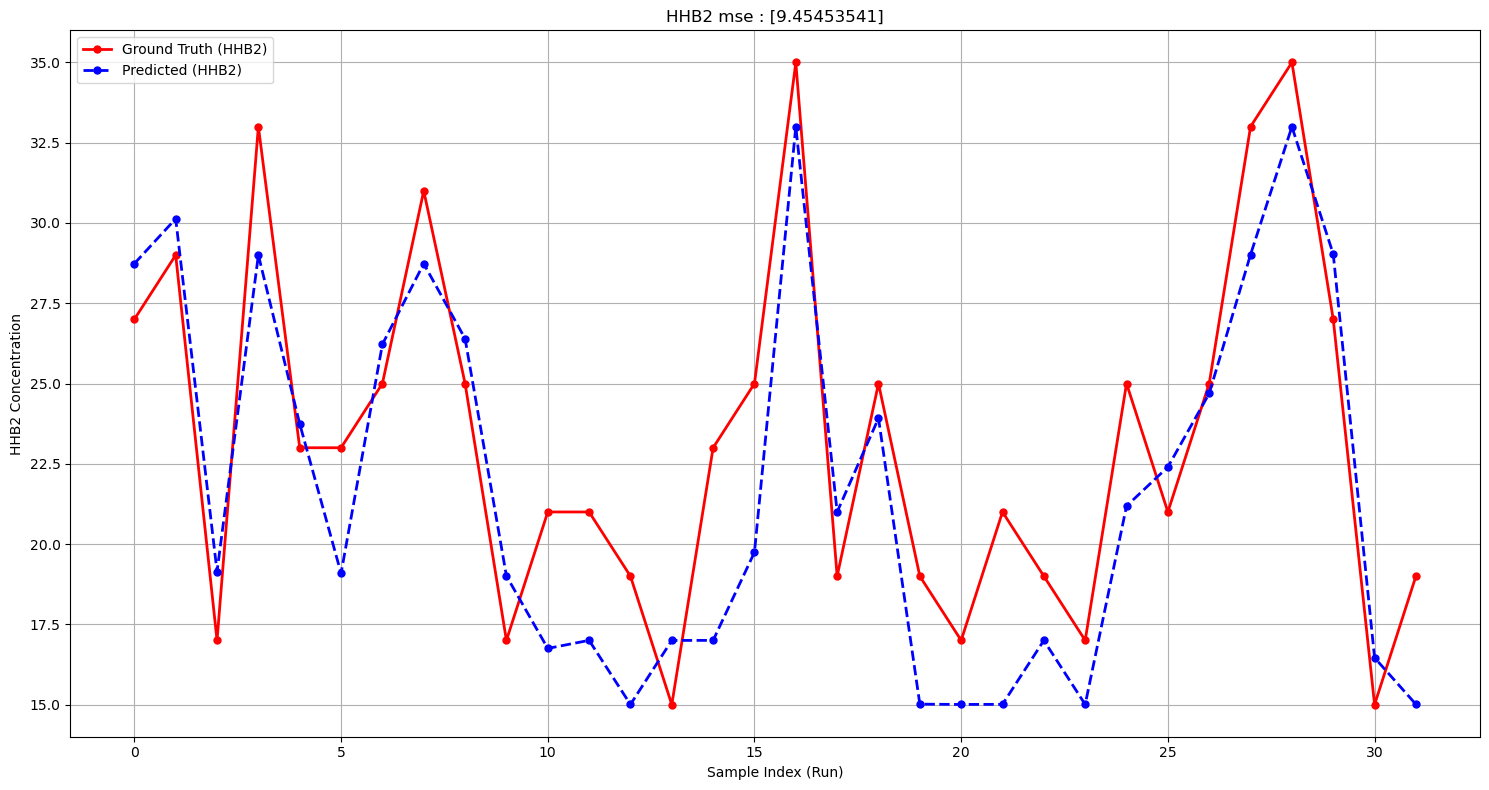

In [368]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15, 8))

plt.plot(y_test, label='Ground Truth (HHB2)', color='red', linewidth=2, marker='o', markersize=5)
plt.plot(y_preds, label='Predicted (HHB2)', color='blue', linestyle='--', linewidth=2, marker='o', markersize=5)

plt.xlabel('Sample Index (Run)')
plt.ylabel('HHB2 Concentration')
plt.title(f'HHB2 mse : {mse}')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()